In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def extract_json(expt, res_dict):
    ROI = expt.split('_')[0]
    mu = float(expt.split('_')[1]) / 100
    gamma = float(expt.split('_')[2]) / 1000
    expt_path = f"{FILE_PATH}{expt}/results.json"
    data = json.load(open(expt_path, 'r'))
    metrics = [data["val_metric"]["global"][-1], data["val_metric"]["focal"][-1]]
    res_dict[ROI]["mu"].append(mu)
    res_dict[ROI]["gamma"].append(gamma)
    res_dict[ROI]["global"].append(metrics[0])
    res_dict[ROI]["focal"].append(metrics[1])

In [3]:
def plot_res(ROI):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.scatter(res_dict[ROI]["mu"], np.log10(res_dict[ROI]["gamma"]), c=res_dict[ROI]["global"], s=500)
    plt.viridis()
    plt.title("Global")
    plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.scatter(res_dict[ROI]["mu"], np.log10(res_dict[ROI]["gamma"]), c=res_dict[ROI]["focal"], s=500)
    plt.viridis()
    plt.title("Focal")
    plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.scatter(res_dict[ROI]["mu"], np.log10(res_dict[ROI]["gamma"]), c=np.array(res_dict[ROI]["focal"]) + np.array(res_dict[ROI]["global"]), s=500)
    plt.viridis()
    plt.title("Combined")
    plt.colorbar()
    plt.show()

In [4]:
def gamma_check(ROI):
    for i in range(5):
        mu_l = i * 0.2
        mu_h = (i + 1) * 0.2
    
        idx = np.logical_and(np.array(res_dict[ROI]['mu']) >= mu_l, np.array(res_dict[ROI]['mu']) <= mu_h)
        gammas = np.array(res_dict[ROI]['gamma'])[idx]
        gamma_idx = np.argsort(gammas)
        print(f"Mu: {(mu_l, mu_h)}")
        print(f"Gamma: {np.log10(gammas[gamma_idx])}")
        print(f"Global: {np.array(res_dict[ROI]['global'])[idx][gamma_idx]}")
        print(f"Focal: {np.array(res_dict[ROI]['focal'])[idx][gamma_idx]}")

In [5]:
def best_model(ROI):
    idx = np.argmin(np.array(res_dict[ROI]["global"]) + np.array(res_dict[ROI]["focal"]))
    print(f"Loss: {np.array(res_dict[ROI]['global'])[idx], np.array(res_dict[ROI]['focal'])[idx], (np.array(res_dict[ROI]['global']) + np.array(res_dict[ROI]['focal']))[idx]}")
    print(f"Mu: {res_dict[ROI]['mu'][idx]}")
    print(f"{res_dict[ROI]['gamma'][idx]}")
    print(f"{np.log10(res_dict[ROI]['gamma'])[idx]}")
    return (res_dict[ROI]['mu'][idx], np.log10(res_dict[ROI]['gamma'])[idx])

In [7]:
FILE_PATH = "C:/Users/roybo/OneDrive - University College London/PhD/PhD_Prog/007_CNN_Virtual_Contrast/logs/UNet/"

expts = [f for f in os.listdir(FILE_PATH) if '_' in f and 'A' not in f]

res_dict = {"32": {"mu": [], "gamma": [], "global": [], "focal": []}, "64": {"mu": [], "gamma": [], "global": [], "focal": []}, "128": {"mu": [], "gamma": [], "global": [], "focal": []}, "256": {"mu": [], "gamma": [], "global": [], "focal": []}}

for expt in expts:
    res = extract_json(expt, res_dict)

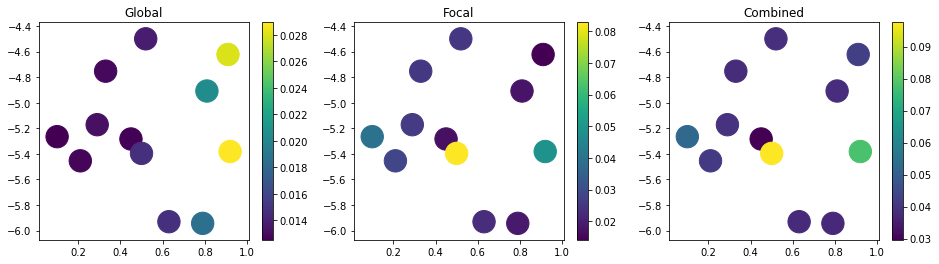

Loss: (0.012612936086952686, 0.017000554129481316, 0.029613490216434002)
Mu: 0.45
5.199999999999999e-06
-5.2839966563652006


('', 4)

In [12]:
ROI = "64"
plot_res(ROI)
_, best_model(ROI)
# gamma_check(ROI)

Loss: (0.014352435246109962, 0.013665162958204746, 0.02801759820431471)
Mu: 0.62
3.092e-05
-4.5097605147537125
Loss: (0.012612936086952686, 0.017000554129481316, 0.029613490216434002)
Mu: 0.45
5.199999999999999e-06
-5.2839966563652006
Loss: (0.013747340999543667, 0.025029117241501808, 0.038776458241045475)
Mu: 0.42
3.967e-06
-5.401537799525849
Loss: (0.014777936041355133, 0.055908769369125366, 0.0706867054104805)
Mu: 0.55
1.946e-05
-4.710857164067667


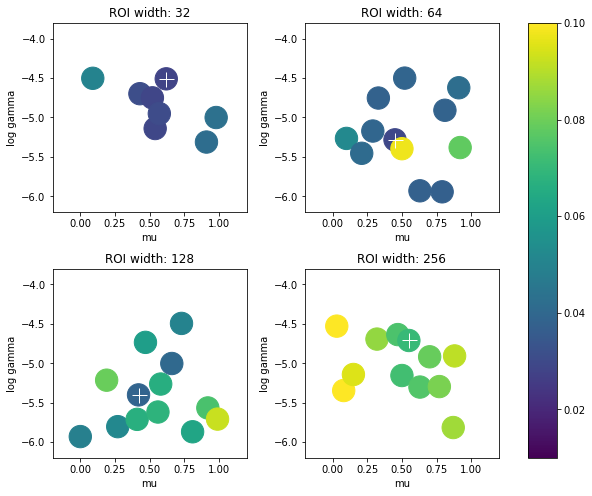

In [56]:
%matplotlib inline
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()
ROIs = ["32", "64", "128", "256"]

for i in range(4):
    mu, log_gamma = best_model(ROIs[i])
    b = axs[i].scatter(res_dict[ROIs[i]]["mu"], np.log10(res_dict[ROIs[i]]["gamma"]), c=np.array(res_dict[ROIs[i]]["global"]) + np.array(res_dict[ROIs[i]]["focal"]), s=500, vmin=0.01, vmax=0.1)
    axs[i].plot(mu, log_gamma, 'w+', markersize=15)
    axs[i].set_title(f"ROI width: {ROIs[i]}")
    axs[i].set_xlabel("mu")
    axs[i].set_ylabel("log gamma")
    axs[i].set_xlim([-0.2, 1.2])
    axs[i].set_ylim([-6.2, -3.8])

plt.viridis()
cbar_ax = fig.add_axes([0.95, 0.125, 0.05, 0.755])
fig.colorbar(b, cbar_ax)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

# plt.show()
plt.savefig("./tune.png", bbox_inches='tight')

(-0.17770267966038059, 0.23740367765947168)

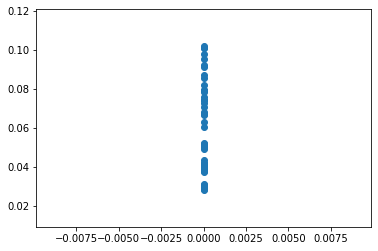

In [49]:
# ROI32 = np.vstack([np.array(res_dict["32"]["global"]) + np.array(res_dict["32"]["focal"]), np.ones(np.array(res_dict["32"]["focal"]).shape) * 32])
# ROI64 = np.vstack([np.array(res_dict["64"]["global"]) + np.array(res_dict["64"]["focal"]), np.ones(np.array(res_dict["64"]["focal"]).shape) * 64])
# ROI128 = np.vstack([np.array(res_dict["128"]["global"]) + np.array(res_dict["128"]["focal"]), np.ones(np.array(res_dict["128"]["focal"]).shape) * 128])
# ROI256 = np.vstack([np.array(res_dict["256"]["global"]) + np.array(res_dict["256"]["focal"]), np.ones(np.array(res_dict["256"]["focal"]).shape) * 256])
# res = np.hstack([ROI32, ROI64, ROI128, ROI256])
g = np.hstack([np.array(res_dict["32"]["global"]), np.array(res_dict["64"]["global"]), np.array(res_dict["128"]["global"]), np.array(res_dict["256"]["global"])])
f = np.hstack([np.array(res_dict["32"]["focal"]), np.array(res_dict["64"]["focal"]), np.array(res_dict["128"]["focal"]), np.array(res_dict["256"]["focal"])])
mu = np.hstack([np.array(res_dict["32"]["mu"]), np.array(res_dict["64"]["mu"]), np.array(res_dict["128"]["mu"]), np.array(res_dict["256"]["mu"])])
gamma = np.hstack([np.array(res_dict["32"]["gamma"]), np.array(res_dict["64"]["gamma"]), np.array(res_dict["128"]["gamma"]), np.array(res_dict["256"]["gamma"])])
import scipy.stats as stat
plt.scatter(gamma, g+f)
# plt.xlim([-0.0001, 0.0001])
stat.pearsonr(gamma, g+f)